# =============================================================

# 영화 데이터 전처리 ver.2

### 각 변수별 상태 파악 -> 전처리 방법 고안

# =============================================================

In [1]:
import pandas as pd

df0 = pd.read_excel('movie_data.xlsx',sheetname = 1)
df = df0.drop(['Name','Code','Released'], axis = 1)
df.head()

,Genre,Level,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,TV,Score,Rescreen
0,drama,adult,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,0,5.77,0
1,drama,all,104,germany,2010,0,805,530,65.8,13,64,0,0,7.61,1
2,drama,adult,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,0,8.51,1
3,ani,over15,110,japan,2006,0,280,280,100.0,4,24,0,0,8.24,1
4,crime,over12,139,japan,2006,0,563056,147103,26.1,560,14439,0,0,8.27,0


### 1. Genre : Categorical Value

In [ ]:
# Genre를 더미변수로 나누려고 했더니 변수가 꽤 많아진다..(20개@.@!)
# 예상해보면 드라마, 코미디, 액션 등의 장르가 재개봉/재상영을 많이 했을 것 같으므로 
# 유의미한 값들에 대해 묶어서 이 범위 안에 포함되면 1, 아니면 0으로 변수를 바꿔주는 것은 어떨까 생각했다.

# 일단 Genre 변수안에 들어있는 values에 대해 살펴보자.

In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt

In [3]:
genre = df['Genre']
genre.head()

0    drama
1    drama
2    drama
3      ani
4    crime
Name: Genre, dtype: object

In [4]:
# 드라마 장르만 어떤 것들이 있나 한번 봐 볼까
genre = df[df['Genre'] == 'drama']
genre.head() 

,Genre,Level,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,TV,Score,Rescreen
0,drama,adult,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,0,5.77,0
1,drama,all,104,germany,2010,0,805,530,65.8,13,64,0,0,7.61,1
2,drama,adult,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,0,8.51,1
5,drama,over12,126,india,2010,0,77539,34359,44.3,400,5410,0,0,8.85,0
11,drama,all,118,japan,2006,0,32156,13433,41.8,132,2538,0,0,8.98,0


In [5]:
# 각 장르별 비율을 계산해보자
genre_list = sorted(list(set(df['Genre'].values)))
print genre_list, type(genre_list)

ratio_of_genres = []
for i in range(len(genre_list)):
    ratios = len(df[df['Genre'] == genre_list[i]])/float(len(df['Genre']))
    ratio_of_genres.append(ratios)
print ratio_of_genres
# 전체 대표장르는 모두 20개. 파이차트를 그려보기 위해 각각의 이름에 따른 비율을 순서대로 리스트에 담았다

[u'SF', u'action', u'adventure', u'ani', u'comedy', u'crime', u'documentary', u'drama', u'erotic', u'family', u'fantasy', u'historical', u'horror', u'melo', u'mistery', u'musical', u'performance', u'thriller', u'war', u'western'] <type 'list'>
[0.022, 0.105, 0.0045, 0.0985, 0.1035, 0.0325, 0.062, 0.3295, 0.002, 0.0095, 0.0115, 0.0055, 0.044, 0.088, 0.0165, 0.004, 0.007, 0.047, 0.006, 0.0015]


In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style

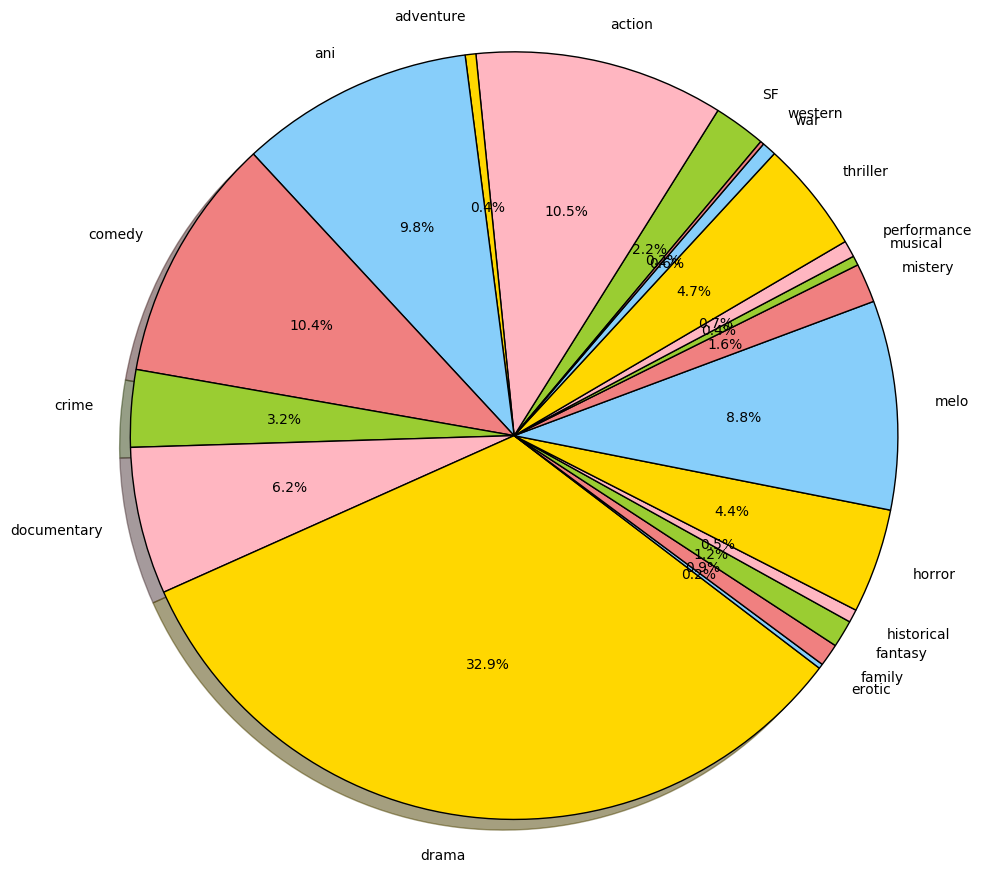

In [7]:
# 그래프로 한 눈에!
labels = genre_list # 각 장르별 이름
sizes = ratio_of_genres # 각 장르별 비율
plt.figure(figsize = [10,10])
colors = ['yellowgreen','lightpink', 'gold', 'lightskyblue' ,'lightcoral']
plt.pie(sizes, labels = labels, startangle=50, shadow=True, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

In [10]:
# 역시 드라마, 코미디, 액션, 애니메이션, 멜로의 비중이 70% 가까이 된다.
# 어떻게 나누는 것이 좋을까.... 

# 잠깐! 그렇다면 재개봉/재상영된 영화들의 분포는 어떻게 될까?

In [11]:
df0_rescreen = df0[df0['Rescreen'] == 1]

genre_list_r = sorted(list(set(df0_rescreen['Genre'].values)))
print genre_list_r, type(genre_list_r)

ratio_of_genres_r = []
for i in range(len(genre_list_r)):
    ratios = len(df0_rescreen[df0_rescreen['Genre'] == genre_list_r[i]])/float(len(df0_rescreen['Genre']))
    ratio_of_genres_r.append(ratios)
print ratio_of_genres_r

[u'SF', u'action', u'adventure', u'ani', u'comedy', u'crime', u'documentary', u'drama', u'family', u'fantasy', u'historical', u'horror', u'melo', u'mistery', u'musical', u'thriller', u'war', u'western'] <type 'list'>
[0.017804154302670624, 0.05637982195845697, 0.002967359050445104, 0.14540059347181009, 0.06824925816023739, 0.008902077151335312, 0.11869436201780416, 0.37091988130563797, 0.01483679525222552, 0.020771513353115726, 0.008902077151335312, 0.02373887240356083, 0.08902077151335312, 0.011869436201780416, 0.011869436201780416, 0.017804154302670624, 0.008902077151335312, 0.002967359050445104]


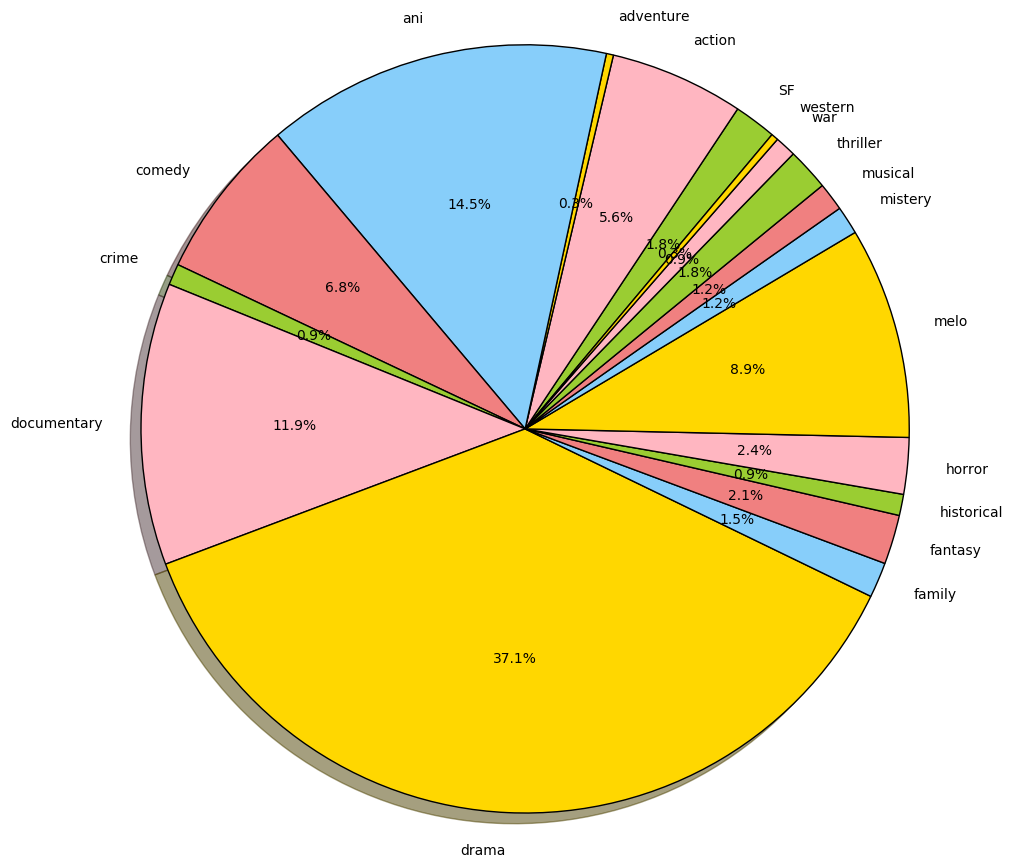

In [12]:
labels_ = genre_list_r # 각 장르별 이름
sizes_ = ratio_of_genres_r # 각 장르별 비율
plt.figure(figsize = [10,10])
colors = ['yellowgreen','lightpink', 'gold', 'lightskyblue' ,'lightcoral']
plt.pie(sizes_, labels = labels_, startangle=50, shadow=True, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

In [22]:
# 전체 데이터에서의 장르별 비율과 조금 차이를 보이긴 하지만, 그래도 역시 drama, melo의 비율은 높게 나타난다.
# 재개봉/재상영된 영화의 비율에 맞게 변수를 나누게되면 overfitting의 위험이 있을 것 같은데...
# 두 그래프를 비교했을 때, drama, melo, comedy 세 장르를 묶으면 어느 한쪽으로 치우치지 않는 것으로 판단된다.

### drama, melo, comedy & etc, 두 column으로 바꿔서 진행해보자. 

In [42]:
#binary 값을 넣어줄 새로운 column을 만들고 그 안에 for문을 이용해서 값을 채워준다

df1 = df.copy()

genre1 = []
for i in range(len(df0)):
    if df1.ix[i].Genre == 'drama':
        genre1.append('1')
    elif df1.ix[i].Genre == 'melo':
        genre1.append('1')
    elif df1.ix[i].Genre == 'comedy':
        genre1.append('1')
    else:
        genre1.append('0')

df1['genre1'] = pd.Series(genre1)
df1.head()

,Genre,Level,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,TV,Score,Rescreen,genre1
0,drama,adult,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,0,5.77,0,1
1,drama,all,104,germany,2010,0,805,530,65.8,13,64,0,0,7.61,1,1
2,drama,adult,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,0,8.51,1,1
3,ani,over15,110,japan,2006,0,280,280,100.0,4,24,0,0,8.24,1,0
4,crime,over12,139,japan,2006,0,563056,147103,26.1,560,14439,0,0,8.27,0,0


In [43]:
del df1['Genre']
df1.head()

,Level,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,TV,Score,Rescreen,genre1
0,adult,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,0,5.77,0,1
1,all,104,germany,2010,0,805,530,65.8,13,64,0,0,7.61,1,1
2,adult,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,0,8.51,1,1
3,over15,110,japan,2006,0,280,280,100.0,4,24,0,0,8.24,1,0
4,over12,139,japan,2006,0,563056,147103,26.1,560,14439,0,0,8.27,0,0


### 2. Level : Categorical Value

In [ ]:
# 이 변수는 전체, 12세, 15세, 청소년 관람불가 
# 이렇게 네 개의 카테고리 값이므로 더미변수로 바로 처리하자.

In [44]:
Level_d = pd.get_dummies(df1['Level'])

df2 = df1.copy()
df2 = df2.join(Level_d)
df2.head()

,Level,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,TV,Score,Rescreen,genre1,adult,all,over12,over15
0,adult,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,0,5.77,0,1,1.0,0.0,0.0,0.0
1,all,104,germany,2010,0,805,530,65.8,13,64,0,0,7.61,1,1,0.0,1.0,0.0,0.0
2,adult,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,0,8.51,1,1,1.0,0.0,0.0,0.0
3,over15,110,japan,2006,0,280,280,100.0,4,24,0,0,8.24,1,0,0.0,0.0,0.0,1.0
4,over12,139,japan,2006,0,563056,147103,26.1,560,14439,0,0,8.27,0,0,0.0,0.0,1.0,0.0


In [45]:
del df2['adult']
del df2['Level']

df2.head()

,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,TV,Score,Rescreen,genre1,all,over12,over15
0,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,0,5.77,0,1,0.0,0.0,0.0
1,104,germany,2010,0,805,530,65.8,13,64,0,0,7.61,1,1,1.0,0.0,0.0
2,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,0,8.51,1,1,0.0,0.0,0.0
3,110,japan,2006,0,280,280,100.0,4,24,0,0,8.24,1,0,0.0,0.0,1.0
4,139,japan,2006,0,563056,147103,26.1,560,14439,0,0,8.27,0,0,0.0,1.0,0.0


### 3. Country : Categorical Value

In [46]:
# 역시 이 변수도 value가 무지무지많다...56개...
country = df2['Country'].values
country, len(list(set(country))), type(country)

(array([u'korea', u'germany', u'usa', ..., u'usa', u'usa', u'italia'], dtype=object),
 56,
 numpy.ndarray)

In [47]:
from operator import itemgetter

countries = []
for i in list(set(country)):
    countries.append((i, len(df2[df2['Country'] == i])))
countries.sort(key=itemgetter(1))
countries

[(u'portugal', 1),
 (u'it', 1),
 (u'malaysia', 1),
 (u'austria', 1),
 (u'greece', 1),
 (u'hungary', 1),
 (u'cuba', 1),
 (u'mongolia', 1),
 (u'norway', 1),
 (u'serbia', 1),
 (u'chile', 1),
 (u'iraq', 1),
 (u'bosnia', 1),
 (u'newzealand', 1),
 (u'croatia', 1),
 (u'bulgaria', 1),
 (u'indonesia', 2),
 (u'southafranceica', 2),
 (u'uruguay', 2),
 (u'iceland', 2),
 (u'brazil', 2),
 (u'singapore', 2),
 (u'poland', 2),
 (u'vietnam', 2),
 (u'swiss', 2),
 (u'romania', 3),
 (u'peru', 3),
 (u'israel', 3),
 (u'irland', 3),
 (u'nederland', 3),
 (u'etc', 3),
 (u'argentina', 4),
 (u'iran', 4),
 (u'taiwan', 5),
 (u'finland', 5),
 (u'czech', 6),
 (u'tailand', 6),
 (u'belgium', 6),
 (u'australia', 7),
 (u'mexico', 8),
 (u'tai', 10),
 (u'denmark', 12),
 (u'india', 14),
 (u'sweden', 14),
 (u'russia', 14),
 (u'canada', 17),
 (u'italia', 19),
 (u'hongkong', 32),
 (u'spain', 42),
 (u'china', 47),
 (u'germany', 50),
 (u'england', 85),
 (u'france', 120),
 (u'japan', 240),
 (u'usa', 547),
 (u'korea', 634)]

In [48]:
country = []
count_country = []
for i in range(len(countries)):
    country.append(countries[i][0])
    count_country.append(float(countries[i][1]))

In [21]:
ratio_of_country = []
for i in range(len(countries)):
    c_ratios = len(df2[df2['Country'] == countries[i][0]])/float(len(df2['Country']))
    ratio_of_country.append(c_ratios)
print ratio_of_country

[0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.002, 0.002, 0.0025, 0.0025, 0.003, 0.003, 0.003, 0.0035, 0.004, 0.005, 0.006, 0.007, 0.007, 0.007, 0.0085, 0.0095, 0.016, 0.021, 0.0235, 0.025, 0.0425, 0.06, 0.12, 0.2735, 0.317]


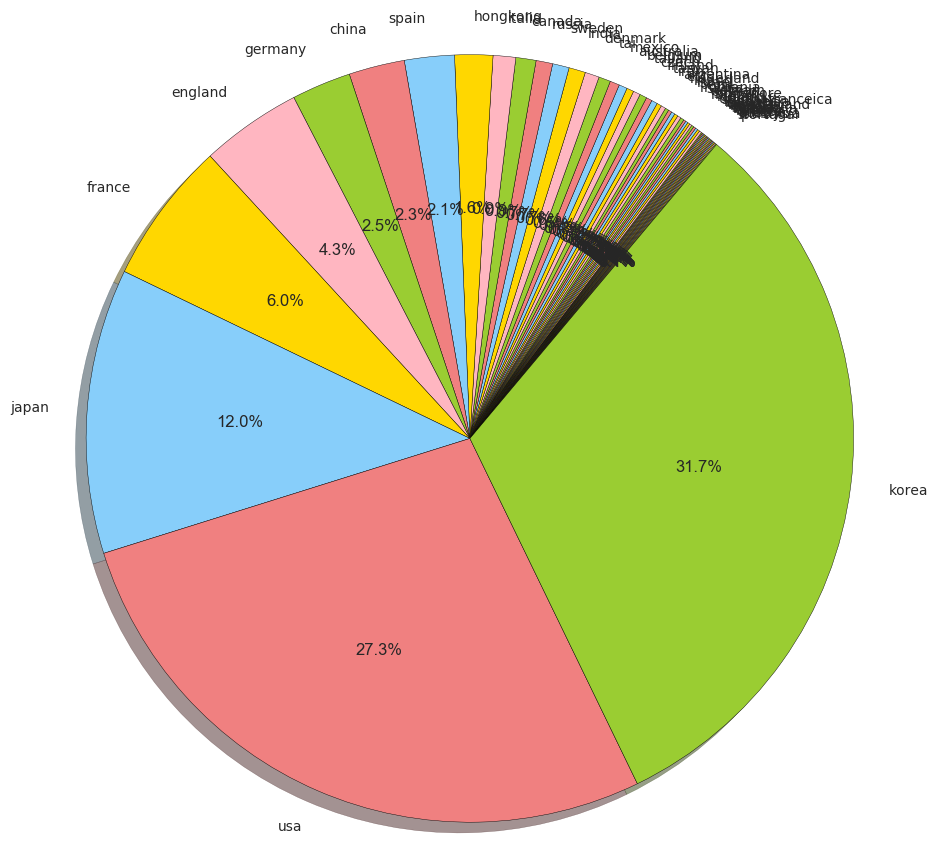

In [49]:
labels_c = country # 각 나라별 이름
sizes_c = ratio_of_country # 각 나라별 비율
plt.figure(figsize = [10,10])
colors = ['yellowgreen','lightpink', 'gold', 'lightskyblue' ,'lightcoral']
plt.pie(sizes_c, labels = labels_c, startangle=50, shadow=True, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

In [50]:
# 상위 5개 나라와 etc로 바꾸는 방법을 적용해보자.
df3 = df2.copy()

country_list = []

for i in range(len(df3)):
    if df3.ix[i]['Country'] == u'korea':
        country_list.append('Korea')
    elif df3.ix[i]['Country'] == u'usa':
        country_list.append('USA')
    elif df3.ix[i]['Country'] == u'japan':
        country_list.append('Japan')
    elif df3.ix[i]['Country'] == u'france':
        country_list.append('France')
    elif df3.ix[i]['Country'] == u'england':
        country_list.append('England')
    else:
        country_list.append('The_others')

df3['country'] = country_list

df3.head()

,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,TV,Score,Rescreen,genre1,all,over12,over15,country
0,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,0,5.77,0,1,0.0,0.0,0.0,Korea
1,104,germany,2010,0,805,530,65.8,13,64,0,0,7.61,1,1,1.0,0.0,0.0,The_others
2,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,0,8.51,1,1,0.0,0.0,0.0,USA
3,110,japan,2006,0,280,280,100.0,4,24,0,0,8.24,1,0,0.0,0.0,1.0,Japan
4,139,japan,2006,0,563056,147103,26.1,560,14439,0,0,8.27,0,0,0.0,1.0,0.0,Japan


In [51]:
country_d = pd.get_dummies(df3['country'])
df3 = df3.join(country_d)
df3.head()

,RunningTime,Country,Published,Win,WholeAud,SeoulAud,PoSA,NoScreen,NoShow,BoxOffice,...,all,over12,over15,country,England,France,Japan,Korea,The_others,USA
0,103,korea,2007,0,1708979,551815,32.3,1016,39823,1,...,0.0,0.0,0.0,Korea,0.0,0.0,0.0,1.0,0.0,0.0
1,104,germany,2010,0,805,530,65.8,13,64,0,...,1.0,0.0,0.0,The_others,0.0,0.0,0.0,0.0,1.0,0.0
2,157,usa,2007,0,1924678,735351,38.2,1335,40654,1,...,0.0,0.0,0.0,USA,0.0,0.0,0.0,0.0,0.0,1.0
3,110,japan,2006,0,280,280,100.0,4,24,0,...,0.0,0.0,1.0,Japan,0.0,0.0,1.0,0.0,0.0,0.0
4,139,japan,2006,0,563056,147103,26.1,560,14439,0,...,0.0,1.0,0.0,Japan,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
del df3['The_others']
del df3['country']

### 3. WholeAud, SeoulAud, PoSA, Score, NoScreen, NoShow : Numerical Value

In [ ]:
# 전체적인 변수간의 상관관계를 살펴보자

In [53]:
df4 = df3.copy()

In [54]:
del df4['SeoulAud']
del df4['NoScreen']

In [55]:
df4_corr = df4.corr()
df4_corr

,RunningTime,Published,Win,WholeAud,PoSA,NoShow,BoxOffice,TV,Score,Rescreen,all,over12,over15,England,France,Japan,Korea,USA
RunningTime,1.000000,-0.062819,0.118022,0.276681,-0.108415,0.306039,0.258208,0.142845,0.221528,0.060693,-0.123922,0.069604,0.115693,-0.029955,-0.009817,-0.015046,-0.029597,0.059509
Published,-0.062819,1.000000,0.030147,0.081327,-0.167449,0.092312,0.074593,-0.009577,-0.090204,0.003614,0.028154,-0.070419,-0.011238,0.002653,-0.049968,-0.070108,0.120004,0.067593
Win,0.118022,0.030147,1.000000,0.307970,-0.171434,0.345298,0.319197,0.247906,0.083714,0.051348,-0.078953,-0.004391,0.047750,-0.048844,-0.070109,-0.102473,0.386474,-0.165911
WholeAud,0.276681,0.081327,0.307970,1.000000,-0.330253,0.955557,0.722213,0.434260,0.168216,0.118950,-0.055227,0.110292,0.060696,-0.053691,-0.074789,-0.105437,0.236919,0.016216
PoSA,-0.108415,-0.167449,-0.171434,-0.330253,1.000000,-0.428410,-0.334353,-0.214884,-0.123161,-0.029797,-0.161237,-0.060059,-0.003512,0.080510,0.116237,0.098856,-0.275742,-0.030049
NoShow,0.306039,0.092312,0.345298,0.955557,-0.428410,1.000000,0.799811,0.469753,0.175191,0.098571,-0.073688,0.125398,0.071959,-0.064717,-0.092671,-0.135603,0.301685,0.017639
BoxOffice,0.258208,0.074593,0.319197,0.722213,-0.334353,0.799811,1.000000,0.426943,0.161836,0.062796,-0.058530,0.087484,0.036050,-0.051591,-0.074930,-0.119990,0.279524,-0.016176
TV,0.142845,-0.009577,0.247906,0.434260,-0.214884,0.469753,0.426943,1.000000,0.119938,0.061734,-0.016345,0.133461,0.032906,-0.038479,-0.021711,-0.086924,0.273249,-0.109223
Score,0.221528,-0.090204,0.083714,0.168216,-0.123161,0.175191,0.161836,0.119938,1.000000,0.229755,0.224902,0.170437,-0.037263,0.021965,0.059018,0.012875,-0.012793,-0.031583
Rescreen,0.060693,0.003614,0.051348,0.118950,-0.029797,0.098571,0.062796,0.061734,0.229755,1.000000,0.103410,0.046647,-0.021461,-0.002136,0.094382,-0.018251,0.020586,-0.063439


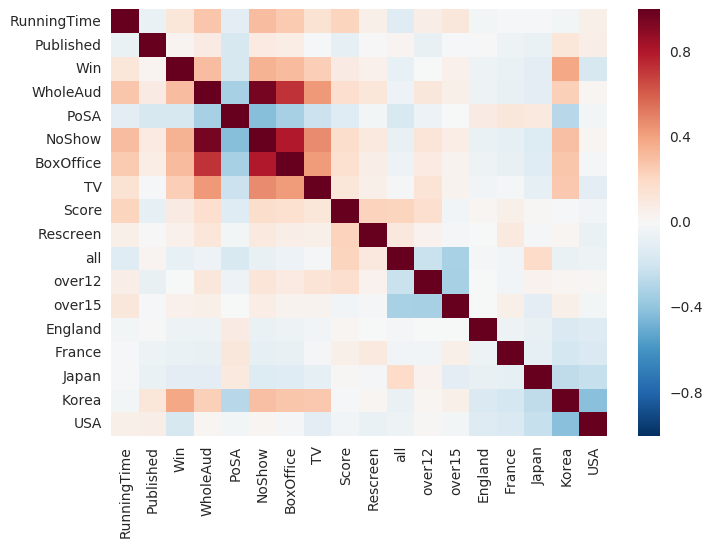

In [56]:
import seaborn as sns
sns.heatmap(df4_corr)
plt.show()

In [ ]:
# Whole 과 Seoul 관객 수는 높은 상관관계를 가지고 있다! SeoulAud 변수를 제외하고, 
# 그 비율을 나타내는 PoSA(Percentage of Seoul Audience)를 사용하자!
# Score는 네이버 영화의 별점을 크롤링한 것! 이것은 어떤 변수와 상관관계가 있을지 correlation을 살펴봐야겠다.
# NoScreen과 NoShow도 상관관계가 높은데, 여기서도 NoShow가 좀 더 의미있을 것으로 생각되니 이 변수를 채택!

In [57]:
# NoShow와 WholeAud도 높은 상관관계를 보이고 있다. => WholeAud 선택
del df4['NoShow']

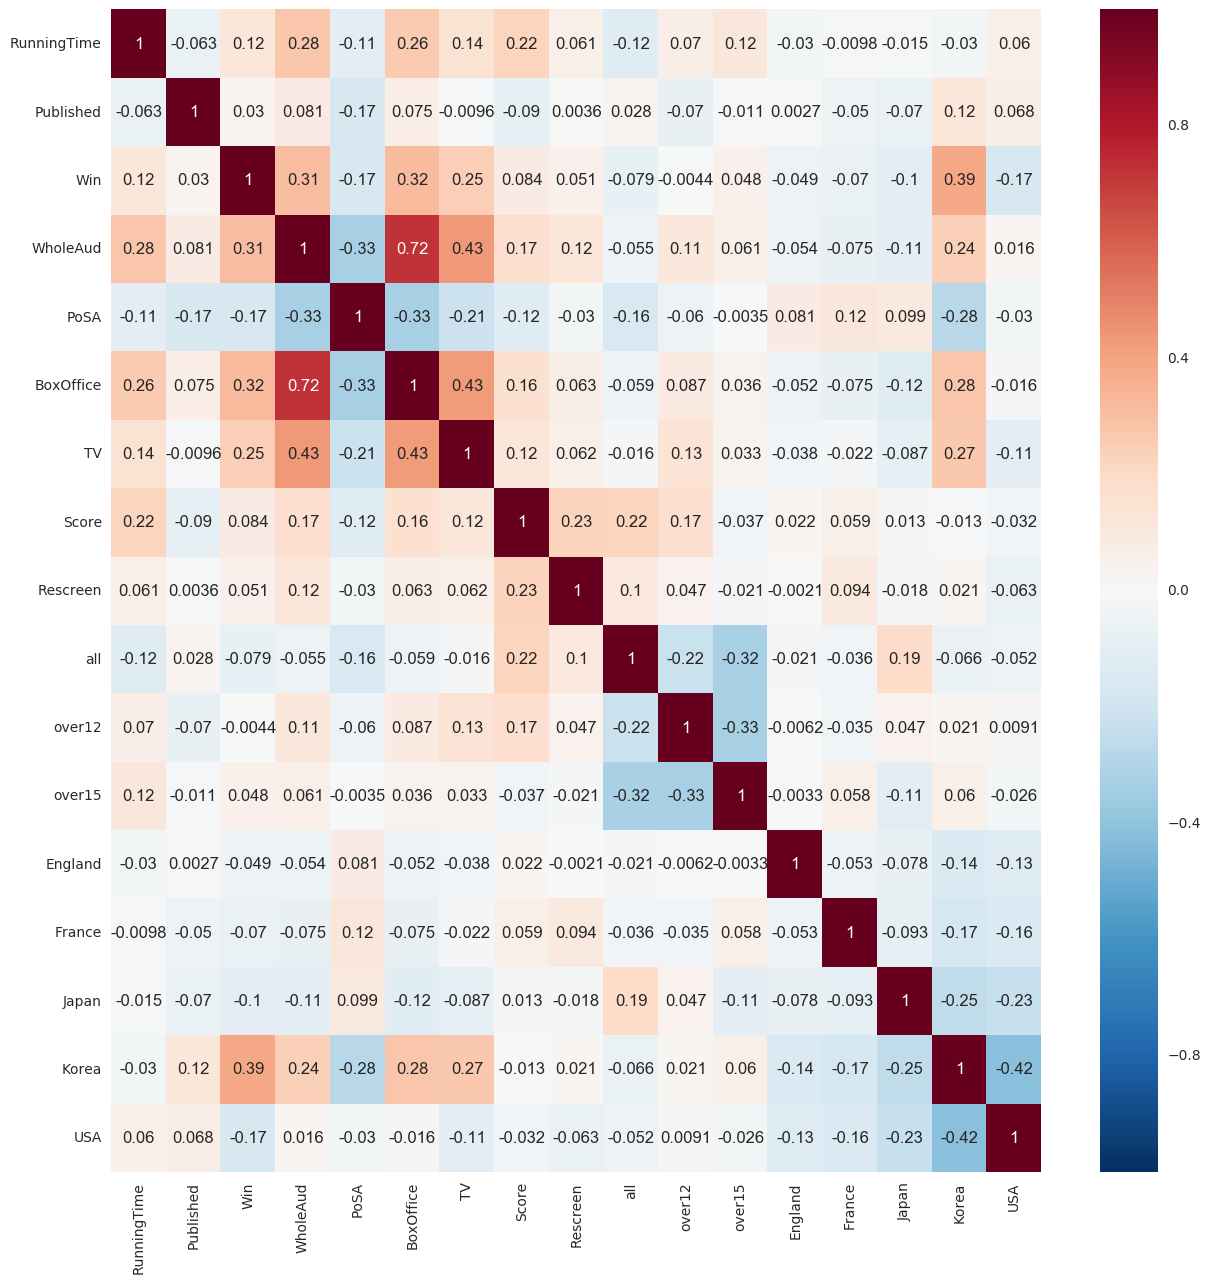

In [58]:
df4_corr1 = df4.corr()
plt.figure(figsize = [15,15])
sns.heatmap(df4_corr1, annot=True)
plt.show()

In [61]:
del df4['Country']

In [63]:
# 전처리를 마친 데이터들을 excel 파일로 따로 저장해서 modeling할때 불러서 쓰자
df4.to_excel("preprocess1.xlsx") 

# ================================================

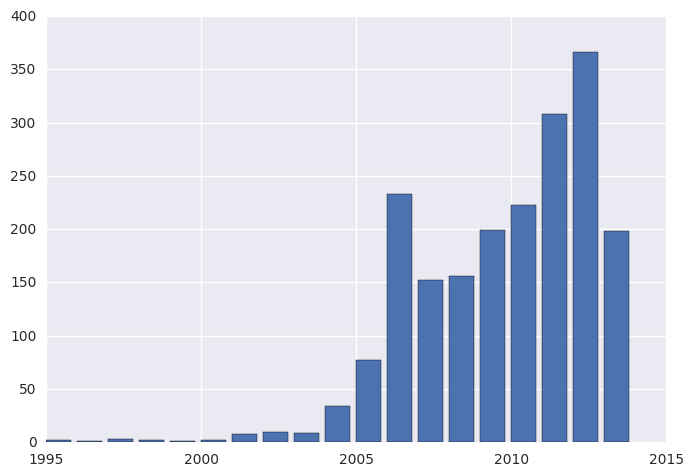

In [38]:
# DataFrame안에 든 영화들의 제작년도별 영화 수를 한 번 간단히 보자.
published_count = pd.value_counts(df4['Published'].values, sort = False)

plt.bar(published_count.index, published_count.values)
plt.xlim([1995,2015])
plt.show()

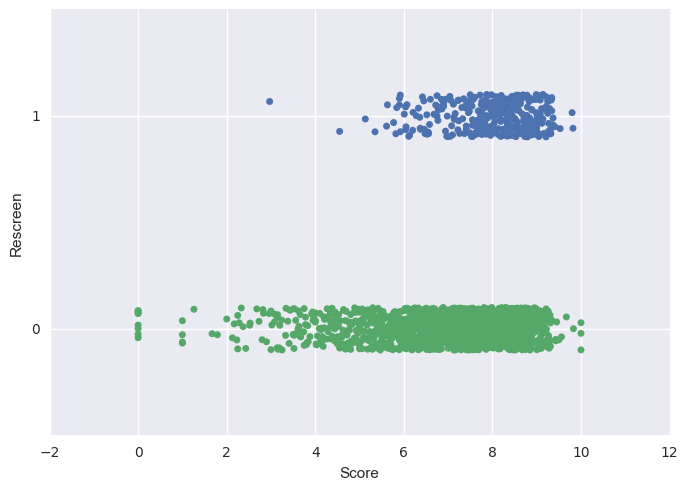

In [39]:
# 영화 별점 별 재개봉/재상영 여부 관계 그래프도 한 번!
import seaborn as sns

sns.stripplot(x="Score", y="Rescreen", data=df4, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

# 예상대로 별점이 낮으면 재개봉 될 확률이 낮아질 것이다!

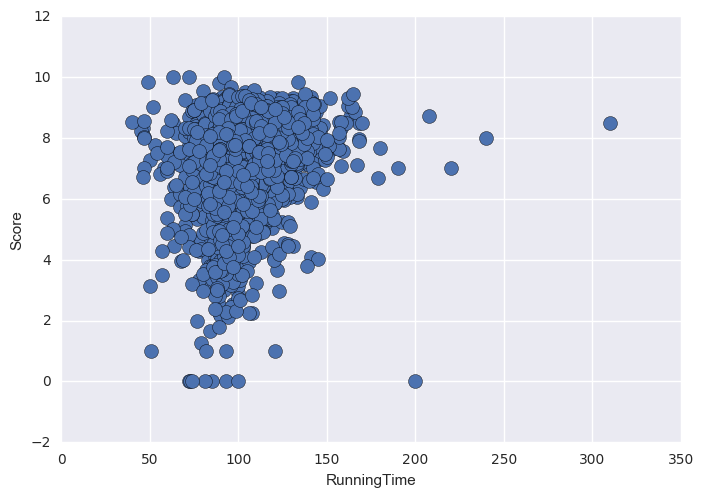

In [40]:
#상영시간과 별점과의 관계는?
df4.plot(kind="scatter", x="RunningTime", y="Score", s=100)
plt.show()
# 혹시나 했더니 역시나 특별한 상관관계는 없다.
### 여기서 Score가 0인 것들은 0점이라기보단 매겨지지 않았을 가능성이 높으므로 추후에 삭제해주자!!

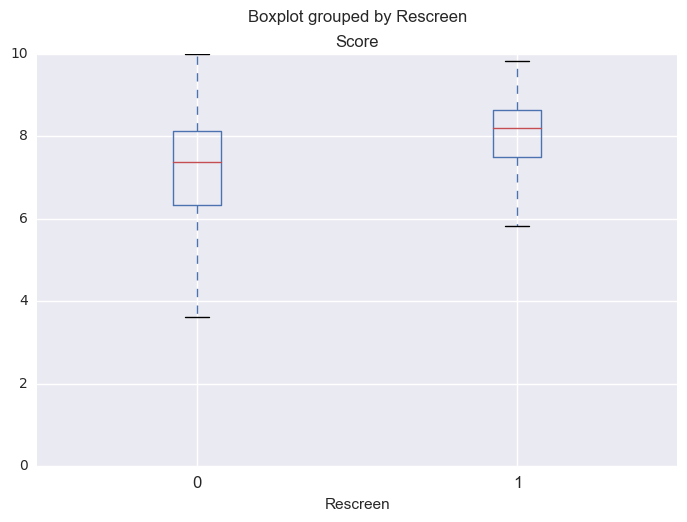

In [41]:
df.boxplot(column='Score', by = 'Rescreen')
plt.show()